In [15]:
import pandas as pd
import numpy as np

import statsmodels.tsa.api as smt
from statsmodels.tsa.seasonal import seasonal_decompose  # Decomposition
from statsmodels.tsa.stattools import adfuller

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
electricity_data = pd.read_csv('Electricity Consumption.csv')

In [18]:
electricity_data

,DATE,Electricty_Consumption_in_TW
0,1/1/1973,35.9728
1,2/1/1973,36.1334
2,3/1/1973,35.0625
3,4/1/1973,33.8416
4,5/1/1973,33.5107
...,...,...
556,5/1/2019,97.5860
557,6/1/2019,110.8580
558,7/1/2019,122.1014
559,8/1/2019,121.7765


In [19]:
electricity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DATE                          561 non-null    object 
 1   Electricty_Consumption_in_TW  561 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.9+ KB


In [20]:
electricity_data.columns = ['month','consumption']

In [21]:
electricity_data['month'] = pd.to_datetime(electricity_data.month, format='%m/%d/%Y')

In [22]:
electricity_data['mon'] = electricity_data.month.dt.month

In [23]:
electricity_data['year'] = electricity_data.month.dt.year

In [24]:
electricity_data.head()

,month,consumption,mon,year
0,1973-01-01,35.9728,1,1973
1,1973-02-01,36.1334,2,1973
2,1973-03-01,35.0625,3,1973
3,1973-04-01,33.8416,4,1973
4,1973-05-01,33.5107,5,1973


In [25]:
## Making month column
data_final = electricity_data.set_index(electricity_data.month, drop=True)

In [26]:
data_final.head()

,month,consumption,mon,year
month,,,,
1973-01-01,1973-01-01,35.9728,1,1973
1973-02-01,1973-02-01,36.1334,2,1973
1973-03-01,1973-03-01,35.0625,3,1973
1973-04-01,1973-04-01,33.8416,4,1973
1973-05-01,1973-05-01,33.5107,5,1973


In [27]:
data_final.drop(columns=['month'], axis=1,inplace=True)

In [28]:
data_final.head()

,consumption,mon,year
month,,,
1973-01-01,35.9728,1,1973
1973-02-01,36.1334,2,1973
1973-03-01,35.0625,3,1973
1973-04-01,33.8416,4,1973
1973-05-01,33.5107,5,1973


<AxesSubplot:xlabel='month'>

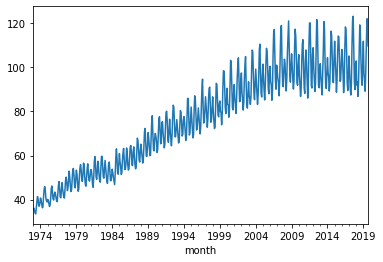

In [29]:
data_final.consumption.plot()

<AxesSubplot:xlabel='mon'>

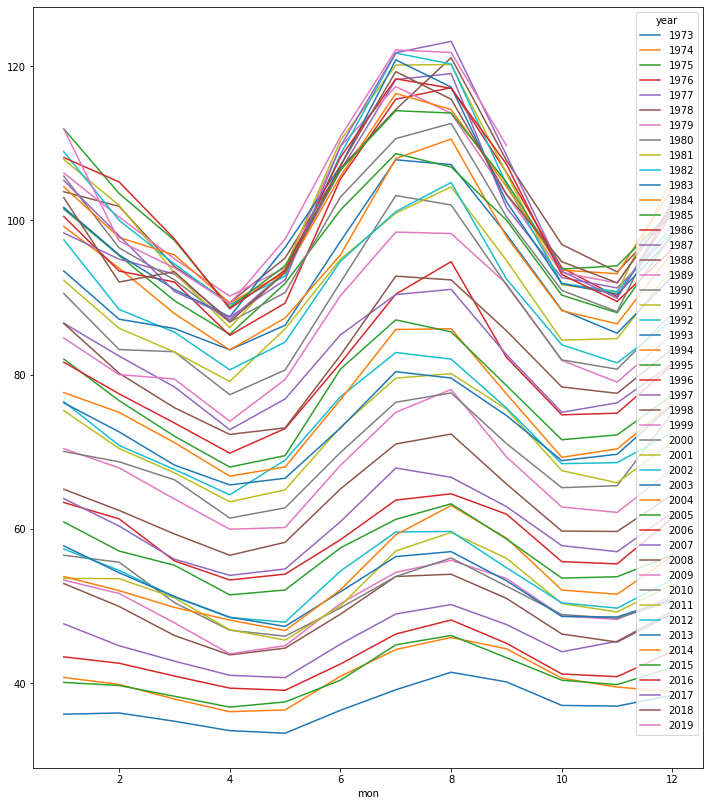

In [30]:
## Electricity consumption of every year monthwise.
pd.pivot_table(data=data_final, index='mon', columns='year', values='consumption').plot(figsize=(12, 14))

<AxesSubplot:xlabel='year'>

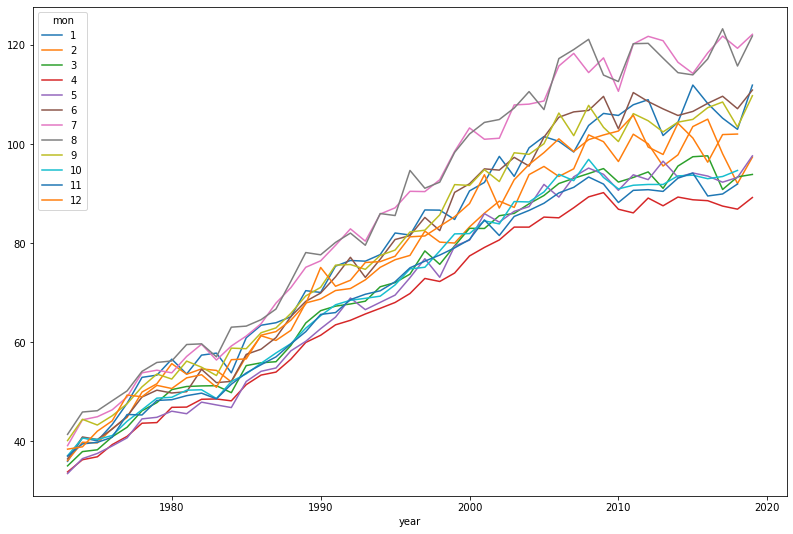

In [31]:
pd.pivot_table(data=data_final, index='year',  columns='mon', values='consumption').plot(figsize=(13.5, 9))

## Decomposition

In [32]:
decompose = seasonal_decompose(data_final.consumption, model='multiplicative', two_sided=False, extrapolate_trend=4)

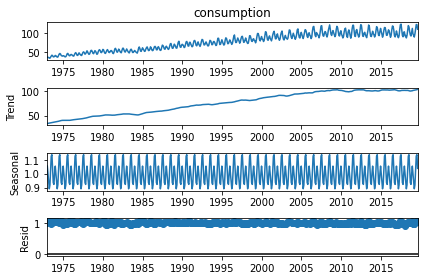

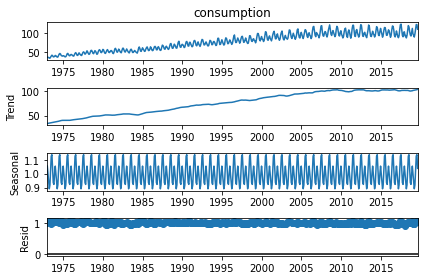

In [33]:
decompose.plot()

In [34]:
decompose_data = pd.concat([decompose.trend,decompose.seasonal,decompose.resid,decompose.observed], axis=1)

In [35]:
decompose_data.columns = ['trend','seasonal','irregular','actual']

In [36]:
decompose_data

,trend,seasonal,irregular,actual
month,,,,
1973-01-01,34.092018,1.054397,1.000731,35.9728
1973-02-01,34.357224,0.996618,1.055266,36.1334
1973-03-01,34.622430,0.946374,1.070096,35.0625
1973-04-01,34.887636,0.891631,1.087913,33.8416
1973-05-01,35.152842,0.919530,1.036710,33.5107
...,...,...,...,...
2019-05-01,101.805712,0.919530,1.042437,97.5860
2019-06-01,102.143504,1.030825,1.052862,110.8580
2019-07-01,102.417300,1.126577,1.058246,122.1014


In [37]:
##STL Decomposition
import statsmodels.tsa.seasonal as stl

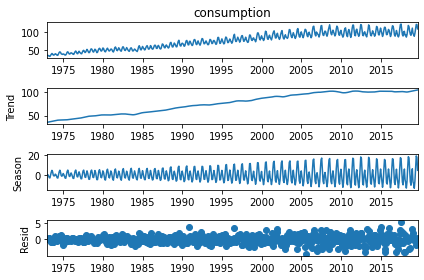

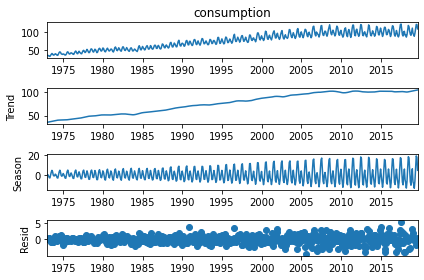

In [38]:
model = stl.STL(data_final.consumption).fit()
model.plot()

In [39]:
cons = data_final.consumption

In [40]:
cons

month
1973-01-01     35.9728
1973-02-01     36.1334
1973-03-01     35.0625
1973-04-01     33.8416
1973-05-01     33.5107
                ...   
2019-05-01     97.5860
2019-06-01    110.8580
2019-07-01    122.1014
2019-08-01    121.7765
2019-09-01    109.7190
Name: consumption, Length: 561, dtype: float64

In [41]:
## Dividing data into train and test
train = cons[:'2019-03-01']
test = cons['2019-04-01':]

In [49]:
from stldecompose import decompose, forecast
from stldecompose.forecast_funcs import (naive,
                                         drift, 
                                         mean, 
                                         seasonal_naive)

In [50]:
decomp = decompose(train, period=12)
decomp

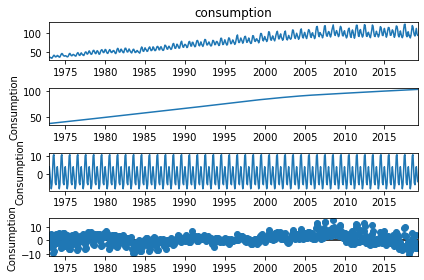

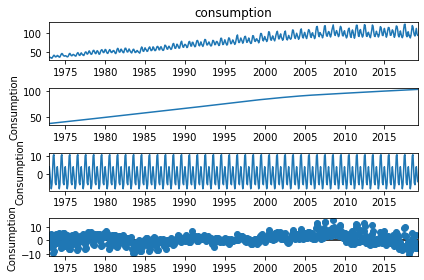

In [51]:
decomp.plot()

In [63]:
## Forecasting
forcst = forecast(decomp, steps=6, fc_func=drift, seasonal=True)
forcst

,drift+seasonal
2019-03-29,95.370935
2019-04-26,97.974545
2019-05-24,106.881528
2019-06-21,114.360512
2019-07-19,114.978310
2019-08-16,107.093695


In [54]:
test

month
2019-04-01     89.1873
2019-05-01     97.5860
2019-06-01    110.8580
2019-07-01    122.1014
2019-08-01    121.7765
2019-09-01    109.7190
Name: consumption, dtype: float64

In [65]:
## MAPE validation
np.mean(np.abs(forcst['drift+seasonal'].values - test.values)/test.values)

0.042055757899350184

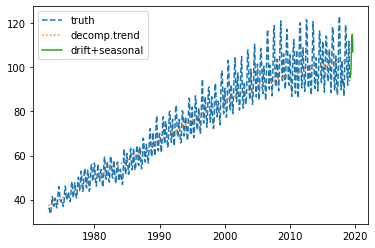

In [68]:
plt.plot(train, '--', label='truth')
plt.plot(decomp.trend, ':', label='decomp.trend')
plt.plot(forcst, '-', label=forcst.columns[0])

plt.legend();

In [69]:
forcst = forecast(decomp, steps=36, fc_func=drift, seasonal=True)

forcst.head()

,drift+seasonal
2019-03-29,95.370935
2019-04-26,97.974545
2019-05-24,106.881528
2019-06-21,114.360512
2019-07-19,114.978310


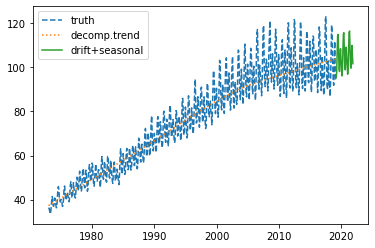

In [70]:
plt.plot(train, '--', label='truth')
plt.plot(decomp.trend, ':', label='decomp.trend')
plt.plot(forcst, '-', label=forcst.columns[0])

plt.legend();

## Moving Average 

month
1973-01-01     35.9728
1973-02-01     36.1334
1973-03-01     35.0625
1973-04-01     33.8416
1973-05-01     33.5107
                ...   
2019-05-01     97.5860
2019-06-01    110.8580
2019-07-01    122.1014
2019-08-01    121.7765
2019-09-01    109.7190
Name: consumption, Length: 561, dtype: float64


<AxesSubplot:xlabel='month'>

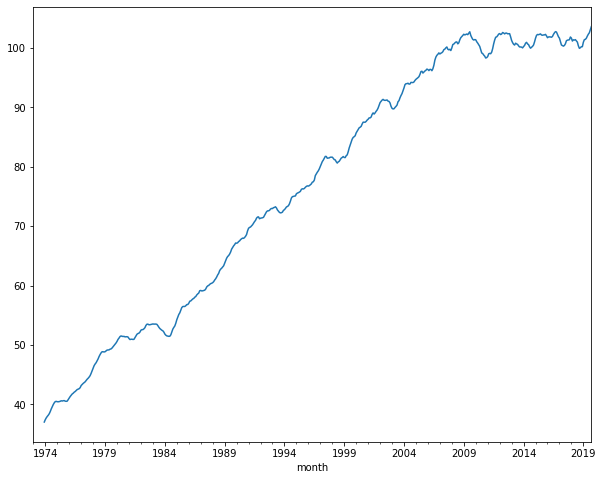

In [87]:
print(cons)
cons.rolling(window=12).mean().plot(figsize=(10,8))

## ETS Model 

In [88]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [89]:
alpha = np.linspace(0,1,5);
beta = np.linspace(0,1,5);
gamma = np.linspace(0,1,5)

best_params = []

for a in alpha:
    for b in beta:
        for g in gamma:
            print('Checking for', {'alpha': a, 'beta': b, 'gamma': g})
            model = ExponentialSmoothing(train, trend='mul', seasonal='mul', seasonal_periods=12)
            model = model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
            fcast = model.forecast(steps=6)
            score = np.mean(np.abs(test - fcast)/test)
            print('MAPE for :', (a,b,g), np.mean(np.abs(test - fcast)/test))
            
            best_params.append({'alpha': a, 'beta': b, 'gamma': g, 'mape': score})

Checking for {'alpha': 0.0, 'beta': 0.0, 'gamma': 0.0}


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-89-f9c6373c73b3>:12: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model = model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


MAPE for : (0.0, 0.0, 0.0) 21.57942147587733
Checking for {'alpha': 0.0, 'beta': 0.0, 'gamma': 0.25}
MAPE for : (0.0, 0.0, 0.25) 0.4579959891949059
Checking for {'alpha': 0.0, 'beta': 0.0, 'gamma': 0.5}
MAPE for : (0.0, 0.0, 0.5) 0.008624906501122532
Checking for {'alpha': 0.0, 'beta': 0.0, 'gamma': 0.75}


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be 

MAPE for : (0.0, 0.0, 0.75) 0.09119708556919433
Checking for {'alpha': 0.0, 'beta': 0.0, 'gamma': 1.0}
MAPE for : (0.0, 0.0, 1.0) 0.05102334329072988
Checking for {'alpha': 0.0, 'beta': 0.25, 'gamma': 0.0}
MAPE for : (0.0, 0.25, 0.0) 21.57942147587733
Checking for {'alpha': 0.0, 'beta': 0.25, 'gamma': 0.25}
MAPE for : (0.0, 0.25, 0.25) 0.4579959891949059
Checking for {'alpha': 0.0, 'beta': 0.25, 'gamma': 0.5}


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information

MAPE for : (0.0, 0.25, 0.5) 0.008624906438753252
Checking for {'alpha': 0.0, 'beta': 0.25, 'gamma': 0.75}
MAPE for : (0.0, 0.25, 0.75) 0.09119708556919433
Checking for {'alpha': 0.0, 'beta': 0.25, 'gamma': 1.0}
MAPE for : (0.0, 0.25, 1.0) 0.05102334329072988
Checking for {'alpha': 0.0, 'beta': 0.5, 'gamma': 0.0}
MAPE for : (0.0, 0.5, 0.0) 21.57942147587733
Checking for {'alpha': 0.0, 'beta': 0.5, 'gamma': 0.25}


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (0.0, 0.5, 0.25) 0.03316671940789953
Checking for {'alpha': 0.0, 'beta': 0.5, 'gamma': 0.5}
MAPE for : (0.0, 0.5, 0.5) 0.008624906673188704
Checking for {'alpha': 0.0, 'beta': 0.5, 'gamma': 0.75}
MAPE for : (0.0, 0.5, 0.75) 0.09119708556919433
Checking for {'alpha': 0.0, 'beta': 0.5, 'gamma': 1.0}


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (0.0, 0.5, 1.0) 0.05102334329072988
Checking for {'alpha': 0.0, 'beta': 0.75, 'gamma': 0.0}
MAPE for : (0.0, 0.75, 0.0) 21.57942147587733
Checking for {'alpha': 0.0, 'beta': 0.75, 'gamma': 0.25}
MAPE for : (0.0, 0.75, 0.25) 0.03316675286358387
Checking for {'alpha': 0.0, 'beta': 0.75, 'gamma': 0.5}


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (0.0, 0.75, 0.5) 0.008624906571354318
Checking for {'alpha': 0.0, 'beta': 0.75, 'gamma': 0.75}
MAPE for : (0.0, 0.75, 0.75) 0.09119708556919433
Checking for {'alpha': 0.0, 'beta': 0.75, 'gamma': 1.0}
MAPE for : (0.0, 0.75, 1.0) 0.05102334329072988
Checking for {'alpha': 0.0, 'beta': 1.0, 'gamma': 0.0}
MAPE for : (0.0, 1.0, 0.0) 21.57942147587733
Checking for {'alpha': 0.0, 'beta': 1.0, 'gamma': 0.25}


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be 

MAPE for : (0.0, 1.0, 0.25) 0.033166738071245656
Checking for {'alpha': 0.0, 'beta': 1.0, 'gamma': 0.5}
MAPE for : (0.0, 1.0, 0.5) 0.008624906115446723
Checking for {'alpha': 0.0, 'beta': 1.0, 'gamma': 0.75}
MAPE for : (0.0, 1.0, 0.75) 0.09119708556919433
Checking for {'alpha': 0.0, 'beta': 1.0, 'gamma': 1.0}
MAPE for : 

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


(0.0, 1.0, 1.0) 0.05102334329072988
Checking for {'alpha': 0.25, 'beta': 0.0, 'gamma': 0.0}
MAPE for : (0.25, 0.0, 0.0) 0.014738962158105884
Checking for {'alpha': 0.25, 'beta': 0.0, 'gamma': 0.25}
MAPE for : (0.25, 0.0, 0.25) 0.015128696571447775
Checking for {'alpha': 0.25, 'beta': 0.0, 'gamma': 0.5}
MAPE for : (0.25, 0.0, 0.5) 0.030178193707019508
Checking for {'alpha': 0.25, 'beta': 0.0, 'gamma': 0.75}


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn(

MAPE for : (0.25, 0.0, 0.75) 0.01092899002145572
Checking for {'alpha': 0.25, 'beta': 0.0, 'gamma': 1.0}
MAPE for : (0.25, 0.0, 1.0) 0.054475478782650355
Checking for {'alpha': 0.25, 'beta': 0.25, 'gamma': 0.0}
MAPE for : (0.25, 0.25, 0.0) 0.035025028729973214
Checking for {'alpha': 0.25, 'beta': 0.25, 'gamma': 0.25}


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (0.25, 0.25, 0.25) 0.00815129925130711
Checking for {'alpha': 0.25, 'beta': 0.25, 'gamma': 0.5}
MAPE for : (0.25, 0.25, 0.5) 0.032364094883347766
Checking for {'alpha': 0.25, 'beta': 0.25, 'gamma': 0.75}
MAPE for : (0.25, 0.25, 0.75) 0.1168327631181915
Checking for {'alpha': 0.25, 'beta': 0.25, 'gamma': 1.0}


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (0.25, 0.25, 1.0) 0.27770158071719875
Checking for {'alpha': 0.25, 'beta': 0.5, 'gamma': 0.0}
MAPE for : (0.25, 0.5, 0.0) 0.04128307689202416
Checking for {'alpha': 0.25, 'beta': 0.5, 'gamma': 0.25}
MAPE for : (0.25, 0.5, 0.25) 0.01564126710564322
Checking for {'alpha': 0.25, 'beta': 0.5, 'gamma': 0.5}


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (0.25, 0.5, 0.5) 0.07046927272116339
Checking for {'alpha': 0.25, 'beta': 0.5, 'gamma': 0.75}
MAPE for : (0.25, 0.5, 0.75) 2.408113352599631
Checking for {'alpha': 0.25, 'beta': 0.5, 'gamma': 1.0}
MAPE for : (0.25, 0.5, 1.0) 106.11294310351552
Checking for {'alpha': 0.25, 'beta': 0.75, 'gamma': 0.0}
MAPE for : (0.25, 0.75, 0.0) 0.07700256667313826
Checking for {'alpha': 0.25, 'beta': 0.75, 'gamma': 0.25}


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information

MAPE for : (0.25, 0.75, 0.25) 0.05371455580254967
Checking for {'alpha': 0.25, 'beta': 0.75, 'gamma': 0.5}
MAPE for : (0.25, 0.75, 0.5) 141.7774256773838
Checking for {'alpha': 0.25, 'beta': 0.75, 'gamma': 0.75}
MAPE for : (0.25, 0.75, 0.75) 15.084359949147403
Checking for {'alpha': 0.25, 'beta': 0.75, 'gamma': 1.0}
MAPE for : (0.25, 0.75, 1.0) 185.18206948978857
Checking for {'alpha': 0.25, 'beta': 1.0, 'gamma': 0.0}


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information

MAPE for : (0.25, 1.0, 0.0) 0.08260022379678826
Checking for {'alpha': 0.25, 'beta': 1.0, 'gamma': 0.25}
MAPE for : (0.25, 1.0, 0.25) 189.39635338608971
Checking for {'alpha': 0.25, 'beta': 1.0, 'gamma': 0.5}
MAPE for : (0.25, 1.0, 0.5) 124.57880377300484
Checking for {'alpha': 0.25, 'beta': 1.0, 'gamma': 0.75}
MAPE for : (0.25, 1.0, 0.75) 124.87557784468133
Checking for {'alpha': 0.25, 'beta': 1.0, 'gamma': 1.0}
MAPE for : (0.25, 1.0, 1.0) 11260.621597314597
Checking for {'alpha': 0.5, 'beta': 0.0, 'gamma': 0.0}


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information

MAPE for : (0.5, 0.0, 0.0) 0.03990316530141884
Checking for {'alpha': 0.5, 'beta': 0.0, 'gamma': 0.25}
MAPE for : (0.5, 0.0, 0.25) 0.024821224006878723
Checking for {'alpha': 0.5, 'beta': 0.0, 'gamma': 0.5}
MAPE for : (0.5, 0.0, 0.5) 0.023917508503990787
Checking for {'alpha': 0.5, 'beta': 0.0, 'gamma': 0.75}


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (0.5, 0.0, 0.75) 0.019329550665250345
Checking for {'alpha': 0.5, 'beta': 0.0, 'gamma': 1.0}
MAPE for : (0.5, 0.0, 1.0) 0.024859561232720578
Checking for {'alpha': 0.5, 'beta': 0.25, 'gamma': 0.0}
MAPE for : (0.5, 0.25, 0.0) 0.05181853104076386
Checking for {'alpha': 0.5, 'beta': 0.25, 'gamma': 0.25}


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (0.5, 0.25, 0.25) 0.04997006451744023
Checking for {'alpha': 0.5, 'beta': 0.25, 'gamma': 0.5}
MAPE for : (0.5, 0.25, 0.5) 0.044213267282905415
Checking for {'alpha': 0.5, 'beta': 0.25, 'gamma': 0.75}
MAPE for : (0.5, 0.25, 0.75) 0.9981441665381269
Checking for {'alpha': 0.5, 'beta': 0.25, 'gamma': 1.0}
MAPE for : (0.5, 0.25, 1.0) 4.600366960849869
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.0}


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.

MAPE for : (0.5, 0.5, 0.0) 0.06782593070485461
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.25}
MAPE for : (0.5, 0.5, 0.25) 0.7011224053390462
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.5}
MAPE for : (0.5, 0.5, 0.5) 1.5891468331766978
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.75}
MAPE for : (0.5, 0.5, 0.75) 0.9635569970441593
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 1.0}


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information

MAPE for : (0.5, 0.5, 1.0) 104.4720136964422
Checking for {'alpha': 0.5, 'beta': 0.75, 'gamma': 0.0}
MAPE for : (0.5, 0.75, 0.0) 0.07761606140412976
Checking for {'alpha': 0.5, 'beta': 0.75, 'gamma': 0.25}
MAPE for : (0.5, 0.75, 0.25) 75326042.40659213
Checking for {'alpha': 0.5, 'beta': 0.75, 'gamma': 0.5}
MAPE for : (0.5, 0.75, 0.5) 1.0551859120880252e+35
Checking for {'alpha': 0.5, 'beta': 0.75, 'gamma': 0.75}


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.

MAPE for : (0.5, 0.75, 0.75) 2.792245282744695e+30
Checking for {'alpha': 0.5, 'beta': 0.75, 'gamma': 1.0}
MAPE for : (0.5, 0.75, 1.0) 127384.46105662192
Checking for {'alpha': 0.5, 'beta': 1.0, 'gamma': 0.0}
MAPE for : (0.5, 1.0, 0.0) 0.10239042746497289
Checking for {'alpha': 0.5, 'beta': 1.0, 'gamma': 0.25}


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information

MAPE for : (0.5, 1.0, 0.25) 9082231353721470.0
Checking for {'alpha': 0.5, 'beta': 1.0, 'gamma': 0.5}
MAPE for : (0.5, 1.0, 0.5) 1.218641257481789
Checking for {'alpha': 0.5, 'beta': 1.0, 'gamma': 0.75}
MAPE for : (0.5, 1.0, 0.75) nan
Checking for {'alpha': 0.5, 'beta': 1.0, 'gamma': 1.0}
MAPE for : (0.5, 1.0, 1.0) 389300700670.0069
Checking for {'alpha': 0.75, 'beta': 0.0, 'gamma': 0.0}
MAPE for : (0.75, 0.0, 0.0) 0.04669817386206631
Checking for {'alpha': 0.75, 'beta': 0.0, 'gamma': 0.25}
MAPE for : (0.75, 0.0, 0.25) 0.03045393841753923
Checking for {'alpha': 0.75, 'beta': 0.0, 'gamma': 0.5}
MAPE for : (0.75, 0.0, 0.5) 0.05743604248583369
Checking for {'alpha': 0.75, 'beta': 0.0, 'gamma': 0.75}


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (0.75, 0.0, 0.75) 0.052538575710376643
Checking for {'alpha': 0.75, 'beta': 0.0, 'gamma': 1.0}
MAPE for : (0.75, 0.0, 1.0) 0.06689957146611962
Checking for {'alpha': 0.75, 'beta': 0.25, 'gamma': 0.0}
MAPE for : (0.75, 0.25, 0.0) 0.06427414072130856
Checking for {'alpha': 0.75, 'beta': 0.25, 'gamma': 0.25}


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (0.75, 0.25, 0.25) 0.05979780075059748
Checking for {'alpha': 0.75, 'beta': 0.25, 'gamma': 0.5}
MAPE for : (0.75, 0.25, 0.5) 0.11465884625266413
Checking for {'alpha': 0.75, 'beta': 0.25, 'gamma': 0.75}
MAPE for : (0.75, 0.25, 0.75) 999001.2034211691
Checking for {'alpha': 0.75, 'beta': 0.25, 'gamma': 1.0}


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.

MAPE for : (0.75, 0.25, 1.0) 16428.357195713877
Checking for {'alpha': 0.75, 'beta': 0.5, 'gamma': 0.0}
MAPE for : (0.75, 0.5, 0.0) 0.08538926646617796
Checking for {'alpha': 0.75, 'beta': 0.5, 'gamma': 0.25}
MAPE for : (0.75, 0.5, 0.25) 0.10640474509206932
Checking for {'alpha': 0.75, 'beta': 0.5, 'gamma': 0.5}
MAPE for : (0.75, 0.5, 0.5) 0.9242734095010651
Checking for {'alpha': 0.75, 'beta': 0.5, 'gamma': 0.75}
MAPE for : (0.75, 0.5, 0.75) 2.3668501993470337e+35
Checking for {'alpha': 0.75, 'beta': 0.5, 'gamma': 1.0}
MAPE for : (0.75, 0.5, 1.0) 54140850.800758876
Checking for {'alpha': 0.75, 'beta': 0.75, 'gamma': 0.0}


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be 

MAPE for : (0.75, 0.75, 0.0) 0.10709108192027166
Checking for {'alpha': 0.75, 'beta': 0.75, 'gamma': 0.25}
MAPE for : (0.75, 0.75, 0.25) 0.8996908053209133
Checking for {'alpha': 0.75, 'beta': 0.75, 'gamma': 0.5}
MAPE for : (0.75, 0.75, 0.5) 4.314116104329787e+53
Checking for {'alpha': 0.75, 'beta': 0.75, 'gamma': 0.75}
MAPE for : (0.75, 0.75, 0.75) 840308.0163118463
Checking for {'alpha': 0.75, 'beta': 0.75, 'gamma': 1.0}
MAPE for : (0.75, 0.75, 1.0) 

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information

5.510582458462164e+21
Checking for {'alpha': 0.75, 'beta': 1.0, 'gamma': 0.0}
MAPE for : (0.75, 1.0, 0.0) 0.12132096512031272
Checking for {'alpha': 0.75, 'beta': 1.0, 'gamma': 0.25}
MAPE for : (0.75, 1.0, 0.25) 11760.743674115825
Checking for {'alpha': 0.75, 'beta': 1.0, 'gamma': 0.5}
MAPE for : (0.75, 1.0, 0.5) 6.221853483958163
Checking for {'alpha': 0.75, 'beta': 1.0, 'gamma': 0.75}
MAPE for : (0.75, 1.0, 0.75) 4.1508264088769715e+270
Checking for {'alpha': 0.75, 'beta': 1.0, 'gamma': 1.0}


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.

MAPE for : (0.75, 1.0, 1.0) 2.5824869465953137e+18
Checking for {'alpha': 1.0, 'beta': 0.0, 'gamma': 0.0}
MAPE for : (1.0, 0.0, 0.0) 0.04822790953837918
Checking for {'alpha': 1.0, 'beta': 0.0, 'gamma': 0.25}
MAPE for : (1.0, 0.0, 0.25) 0.032437657487073064
Checking for {'alpha': 1.0, 'beta': 0.0, 'gamma': 0.5}
MAPE for : (1.0, 0.0, 0.5) 0.08183050102441579
Checking for {'alpha': 1.0, 'beta': 0.0, 'gamma': 0.75}
MAPE for : (1.0, 0.0, 0.75) 0.1091142030500395
Checking for {'alpha': 1.0, 'beta': 0.0, 'gamma': 1.0}


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (1.0, 0.0, 1.0) 0.11550170946837045
Checking for {'alpha': 1.0, 'beta': 0.25, 'gamma': 0.0}
MAPE for : (1.0, 0.25, 0.0) 0.061541984481023215
Checking for {'alpha': 1.0, 'beta': 0.25, 'gamma': 0.25}
MAPE for : (1.0, 0.25, 0.25) 0.052675801863083065
Checking for {'alpha': 1.0, 'beta': 0.25, 'gamma': 0.5}


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (1.0, 0.25, 0.5) 0.14805776361989856
Checking for {'alpha': 1.0, 'beta': 0.25, 'gamma': 0.75}
MAPE for : (1.0, 0.25, 0.75) 22354.25532185186
Checking for {'alpha': 1.0, 'beta': 0.25, 'gamma': 1.0}
MAPE for : (1.0, 0.25, 1.0) nan
Checking for {'alpha': 1.0, 'beta': 0.5, 'gamma': 0.0}


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1368: RuntimeWarning: invalid value encountered in double_scalars
  alphac * trended(lvls[i - 1], dampen(b[i - 1], phi))
C:\Users\DELL\

MAPE for : (1.0, 0.5, 0.0) 0.0691206838966427
Checking for {'alpha': 1.0, 'beta': 0.5, 'gamma': 0.25}
MAPE for : (1.0, 0.5, 0.25) 0.06677548692254073
Checking for {'alpha': 1.0, 'beta': 0.5, 'gamma': 0.5}
MAPE for : (1.0, 0.5, 0.5) 6.500951991315321
Checking for {'alpha': 1.0, 'beta': 0.5, 'gamma': 0.75}


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.

MAPE for : (1.0, 0.5, 0.75) 6.783585575883169e+18
Checking for {'alpha': 1.0, 'beta': 0.5, 'gamma': 1.0}
MAPE for : (1.0, 0.5, 1.0) nan
Checking for {'alpha': 1.0, 'beta': 0.75, 'gamma': 0.0}
MAPE for : (1.0, 0.75, 0.0) 0.05544157576069545
Checking for {'alpha': 1.0, 'beta': 0.75, 'gamma': 0.25}


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.

MAPE for : (1.0, 0.75, 0.25) 0.9618058913704229
Checking for {'alpha': 1.0, 'beta': 0.75, 'gamma': 0.5}
MAPE for : (1.0, 0.75, 0.5) 8.392503344948266e+18
Checking for {'alpha': 1.0, 'beta': 0.75, 'gamma': 0.75}
MAPE for : (1.0, 0.75, 0.75) 42251566965.7505
Checking for {'alpha': 1.0, 'beta': 0.75, 'gamma': 1.0}
MAPE for : (1.0, 0.75, 1.0) nan
Checking for {'alpha': 1.0, 'beta': 1.0, 'gamma': 0.0}


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information

MAPE for : (1.0, 1.0, 0.0) 0.016249979946556678
Checking for {'alpha': 1.0, 'beta': 1.0, 'gamma': 0.25}
MAPE for : (1.0, 1.0, 0.25) 10871186466867.266
Checking for {'alpha': 1.0, 'beta': 1.0, 'gamma': 0.5}
MAPE for : (1.0, 1.0, 0.5) 1.3135995995589943e+67
Checking for {'alpha': 1.0, 'beta': 1.0, 'gamma': 0.75}
MAPE for : (1.0, 1.0, 0.75) 4.4411993003074345e+61
Checking for {'alpha': 1.0, 'beta': 1.0, 'gamma': 1.0}


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information

MAPE for : (1.0, 1.0, 1.0) nan


In [90]:
best_params

[{'alpha': 0.0, 'beta': 0.0, 'gamma': 0.0, 'mape': 21.57942147587733},
 {'alpha': 0.0, 'beta': 0.0, 'gamma': 0.25, 'mape': 0.4579959891949059},
 {'alpha': 0.0, 'beta': 0.0, 'gamma': 0.5, 'mape': 0.008624906501122532},
 {'alpha': 0.0, 'beta': 0.0, 'gamma': 0.75, 'mape': 0.09119708556919433},
 {'alpha': 0.0, 'beta': 0.0, 'gamma': 1.0, 'mape': 0.05102334329072988},
 {'alpha': 0.0, 'beta': 0.25, 'gamma': 0.0, 'mape': 21.57942147587733},
 {'alpha': 0.0, 'beta': 0.25, 'gamma': 0.25, 'mape': 0.4579959891949059},
 {'alpha': 0.0, 'beta': 0.25, 'gamma': 0.5, 'mape': 0.008624906438753252},
 {'alpha': 0.0, 'beta': 0.25, 'gamma': 0.75, 'mape': 0.09119708556919433},
 {'alpha': 0.0, 'beta': 0.25, 'gamma': 1.0, 'mape': 0.05102334329072988},
 {'alpha': 0.0, 'beta': 0.5, 'gamma': 0.0, 'mape': 21.57942147587733},
 {'alpha': 0.0, 'beta': 0.5, 'gamma': 0.25, 'mape': 0.03316671940789953},
 {'alpha': 0.0, 'beta': 0.5, 'gamma': 0.5, 'mape': 0.008624906673188704},
 {'alpha': 0.0, 'beta': 0.5, 'gamma': 0.75, 'm

In [91]:
min(best_params, key=lambda x: x['mape'])

{'alpha': 0.25, 'beta': 0.25, 'gamma': 0.25, 'mape': 0.00815129925130711}

In [92]:
# Initialise model
ets_model = ExponentialSmoothing(train, trend='mul', seasonal='mul', seasonal_periods=12)

ets_fit = ets_model.fit(smoothing_level=0.25, smoothing_slope=0.25, smoothing_seasonal=0.25)

fcast = ets_fit.forecast(steps=36)

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
<ipython-input-92-34b8c866debf>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  ets_fit = ets_model.fit(smoothing_level=0.25, smoothing_slope=0.25, smoothing_seasonal=0.25)


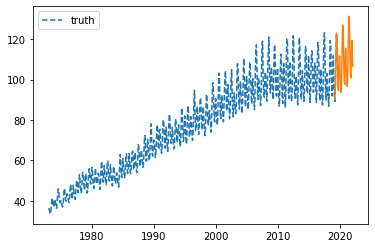

In [94]:
plt.plot(cons, '--', label='truth')
plt.plot(fcast, '-')

plt.legend();

## ARIMA model 

#### Box-jenkins methodology 

In [95]:
## Checking stationarity by AD Fuller test
adfuller(cons)

(-1.7405933729832443,
 0.41032816044686793,
 15,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 2295.409663118043)

In [96]:
adfuller(np.log(cons))

(-3.0018666788915827,
 0.03472044330065443,
 15,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 -2515.6635118596973)

In [114]:
ln_cons = np.log(cons)

In [104]:
adfuller(np.log(cons).diff(1).dropna())

(-6.884809722917913,
 1.4034181751306841e-09,
 14,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 -2505.200358302891)

In [108]:
stationary_series = np.log(cons).diff(1).dropna()

<AxesSubplot:xlabel='month'>

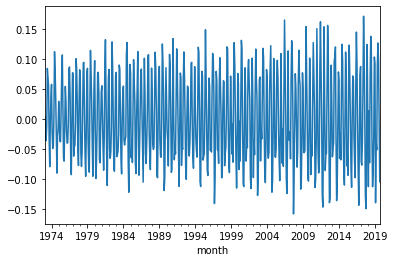

In [109]:
stationary_series.plot()

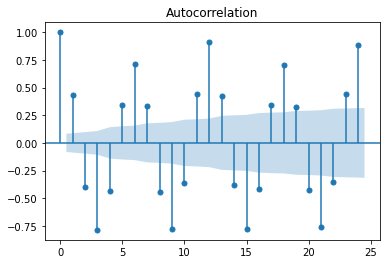

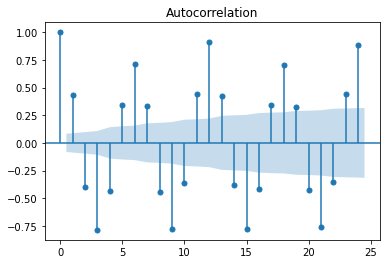

In [110]:
#Autocorrelation function
smt.graphics.plot_acf(stationary_series, lags=24)

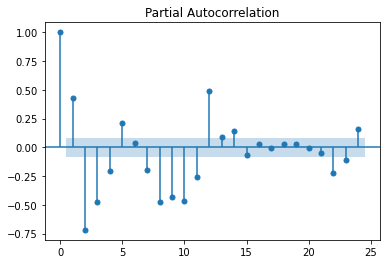

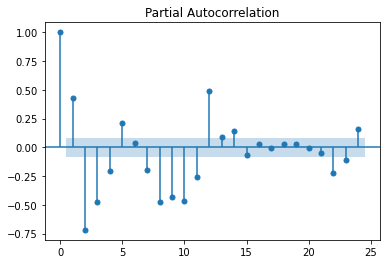

In [111]:
## Partial auto-correlation function
smt.graphics.plot_pacf(stationary_series, lags=24, method='ols')

In [115]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(ln_cons, order = (1,2,1), seasonal_order= (1,0,1,6),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False).fit()

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [116]:
print(model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                       consumption   No. Observations:                  561
Model:             SARIMAX(1, 2, 1)x(1, 0, 1, 6)   Log Likelihood                1106.747
Date:                           Tue, 13 Jul 2021   AIC                          -2203.494
Time:                                   04:23:25   BIC                          -2181.935
Sample:                               01-01-1973   HQIC                         -2195.069
                                    - 09-01-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2350      0.049      4.767      0.000       0.138       0.332
ma.L1         -1.0000     78.437     -0.013

In [119]:
import sys
import itertools
import warnings

def auto_arima(timeseries, regressors=None, p=range(0, 2), d=range(0, 2), q=range(0, 2),
              P=range(0, 2), D=range(0, 1), Q=range(0, 2)):

    # Generate all different combinations of p, d and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(P, D, Q))]
    
    warnings.filterwarnings("ignore") # specify to ignore warning messages

    best_aic = np.inf
    best_pdq = None
    best_seasonal_pdq = None
    best_results = None
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:

            try:
                temp_model = sm.tsa.statespace.SARIMAX(endog=timeseries,
                                                 exog=regressors,
                                                 order = param,
                                                 seasonal_order = param_seasonal,
                                                 enforce_stationarity=False,
                                                 enforce_invertibility=False)
                temp_results = temp_model.fit()

                print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, temp_results.aic))
                
                if temp_results.aic < best_aic:
                    best_aic = temp_results.aic
                    best_pdq = param
                    best_seasonal_pdq = param_seasonal
                    best_results = temp_results
                
            except:
                #print("Unexpected error:", sys.exc_info()[0])
                continue
    print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))
    print(best_results.summary().tables[0])
    print(best_results.summary().tables[1])
    #return best_results

In [120]:
best_results = auto_arima(ln_cons,  p=range(0, 3), d=range(1, 2), q=range(0, 3),
                         P=range(0, 3), D=range(0, 2), Q=range(0, 3))

SARIMAX(0, 1, 0)x(0, 0, 0, 6)12 - AIC:-1312.094438505867
SARIMAX(0, 1, 0)x(0, 0, 1, 6)12 - AIC:-1432.2634663499964
SARIMAX(0, 1, 0)x(0, 0, 2, 6)12 - AIC:-1801.5212073118535
SARIMAX(0, 1, 0)x(0, 1, 0, 6)12 - AIC:-1622.2435575893576
SARIMAX(0, 1, 0)x(0, 1, 1, 6)12 - AIC:-2170.453973268474
SARIMAX(0, 1, 0)x(0, 1, 2, 6)12 - AIC:-2261.6881222577895
SARIMAX(0, 1, 0)x(1, 0, 0, 6)12 - AIC:-1703.4320392057962
SARIMAX(0, 1, 0)x(1, 0, 1, 6)12 - AIC:-2197.9025014328217
SARIMAX(0, 1, 0)x(1, 0, 2, 6)12 - AIC:-2286.2134987228847
SARIMAX(0, 1, 0)x(1, 1, 0, 6)12 - AIC:-2413.2254205873814
SARIMAX(0, 1, 0)x(1, 1, 1, 6)12 - AIC:-2421.055397752073
SARIMAX(0, 1, 0)x(1, 1, 2, 6)12 - AIC:-2576.9750534294635
SARIMAX(0, 1, 0)x(2, 0, 0, 6)12 - AIC:-2414.6401409672944
SARIMAX(0, 1, 0)x(2, 0, 1, 6)12 - AIC:-2422.8885676435093
SARIMAX(0, 1, 0)x(2, 0, 2, 6)12 - AIC:-2609.3435176270223
SARIMAX(0, 1, 0)x(2, 1, 0, 6)12 - AIC:-2385.826387845234
SARIMAX(0, 1, 0)x(2, 1, 1, 6)12 - AIC:-2470.8273423917008
SARIMAX(0, 1, 0)x(

In [121]:
  import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(np.log(train), order = (2,1,1), seasonal_order= (2,0,2,6),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False).fit()

print(model.summary())

                                       SARIMAX Results                                        
Dep. Variable:                            consumption   No. Observations:                  555
Model:             SARIMAX(2, 1, 1)x(2, 0, [1, 2], 6)   Log Likelihood                1324.768
Date:                                Tue, 13 Jul 2021   AIC                          -2633.536
Time:                                        05:20:09   BIC                          -2599.204
Sample:                                    01-01-1973   HQIC                         -2620.109
                                         - 03-01-2019                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6507      0.055     11.829      0.000       0.543       0.758
ar.

In [124]:
pred = np.exp(model.predict(start='2018-10-01'))
pred

2018-10-01     91.311969
2018-11-01     92.155261
2018-12-01    101.298144
2019-01-01    106.754271
2019-02-01    102.283670
2019-03-01     92.801160
Freq: MS, Name: predicted_mean, dtype: float64

In [127]:
actual =cons['2018-10-01':'2019-03-01']
actual

month
2018-10-01     94.6492
2018-11-01     91.9079
2018-12-01    101.9883
2019-01-01    111.8520
2019-02-01     97.3261
2019-03-01     93.8406
Name: consumption, dtype: float64

In [130]:
## MAPE for train
print('MAPE', np.mean(np.abs(actual -pred)/actual))

MAPE 0.025384568771336446


In [132]:
## Test data forecasting
fcast_test = np.exp(model.forecast(steps=6))
fcast_test

2019-04-01     87.857113
2019-05-01     93.543254
2019-06-01    108.150949
2019-07-01    119.643849
2019-08-01    118.554053
2019-09-01    105.862182
Freq: MS, Name: predicted_mean, dtype: float64

In [133]:
test

month
2019-04-01     89.1873
2019-05-01     97.5860
2019-06-01    110.8580
2019-07-01    122.1014
2019-08-01    121.7765
2019-09-01    109.7190
Name: consumption, dtype: float64

In [135]:
## MAPE for Test
print('MAPE_test', np.mean(np.abs(test -fcast_test)/test))

MAPE_test 0.0270836707917872


In [136]:
## 36 months forecast
fcast_36months = np.exp(model.forecast(steps=36))

In [137]:
fcast_36months

2019-04-01     87.857113
2019-05-01     93.543254
2019-06-01    108.150949
2019-07-01    119.643849
2019-08-01    118.554053
2019-09-01    105.862182
2019-10-01     93.619988
2019-11-01     91.426201
2019-12-01    101.485576
2020-01-01    107.624018
2020-02-01     98.533493
2020-03-01     94.262852
2020-04-01     88.044958
2020-05-01     93.746118
2020-06-01    108.486244
2020-07-01    120.102122
2020-08-01    119.012030
2020-09-01    106.173286
2020-10-01     93.804676
2020-11-01     91.578975
2020-12-01    101.724525
2021-01-01    107.915654
2021-02-01     98.726446
2021-03-01     94.427499
2021-04-01     88.163160
2021-05-01     93.926341
2021-06-01    108.814960
2021-07-01    120.561341
2021-08-01    119.473694
2021-09-01    106.487096
2021-10-01     93.990907
2021-11-01     91.732966
2021-12-01    101.965600
2022-01-01    108.209970
2022-02-01     98.920865
2022-03-01     94.593437
Freq: MS, Name: predicted_mean, dtype: float64

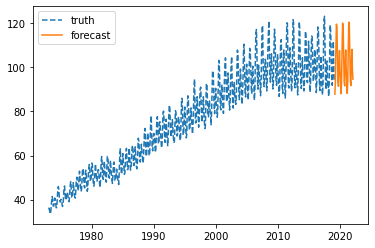

In [139]:
plt.plot(train, '--', label='truth')
plt.plot(fcast_36months, '-', label='forecast')

plt.legend();